In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import accuracy_score
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [81]:
data = pd.read_csv('customer_churn_data.csv')

In [82]:
data

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes


In [83]:
data.sample(5)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
212,213,54,Female,37,106.26,One-Year,DSL,3931.62,No,Yes
890,891,53,Female,8,41.55,One-Year,NaN,332.40,No,Yes
804,805,40,Female,1,86.82,Month-to-Month,Fiber Optic,86.82,Yes,Yes
716,717,46,Female,7,92.74,One-Year,NaN,649.18,No,Yes
180,181,51,Female,2,116.48,Month-to-Month,Fiber Optic,232.96,Yes,Yes


In [84]:
data.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [85]:
data.duplicated().sum()

0

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [87]:
data.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [88]:
data['InternetService'].value_counts()

InternetService
Fiber Optic    395
DSL            308
Name: count, dtype: int64

In [89]:
data['Churn'].value_counts()

Churn
Yes    883
No     117
Name: count, dtype: int64

In [90]:
data['InternetService'] = data['InternetService'].fillna("")

<Axes: >

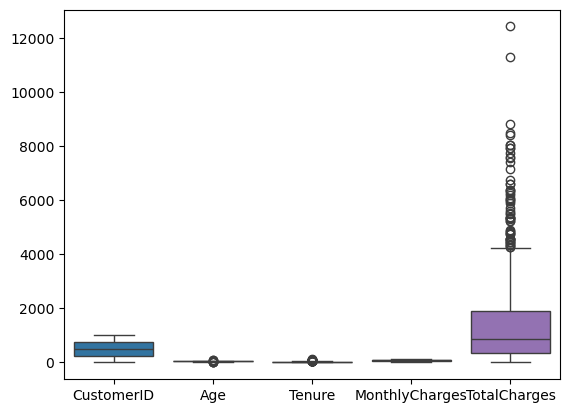

In [91]:
sns.boxplot(data)

In [92]:
data

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,,4465.56,No,Yes


In [93]:
numeric_df_data = data.select_dtypes(["number"])

In [94]:
numeric_df_data

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
0,1,49,4,88.35,353.40
1,2,43,0,36.67,0.00
2,3,51,2,63.79,127.58
3,4,60,8,102.34,818.72
4,5,42,32,69.01,2208.32
...,...,...,...,...,...
995,996,42,41,37.14,1522.74
996,997,62,9,80.93,728.37
997,998,51,15,111.72,1675.80
998,999,39,68,65.67,4465.56


In [95]:
numeric_df_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


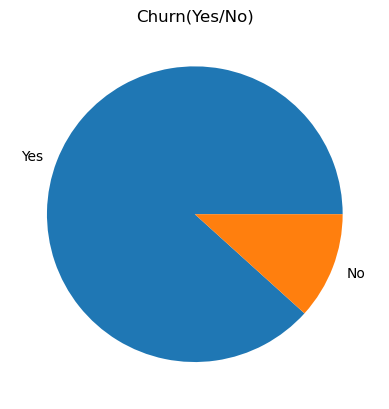

In [96]:
data['Churn'].value_counts().plot(kind = "pie")
plt.title("Churn(Yes/No)")
plt.ylabel("")
plt.show()

In [97]:
data.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [98]:
data.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [99]:
data.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

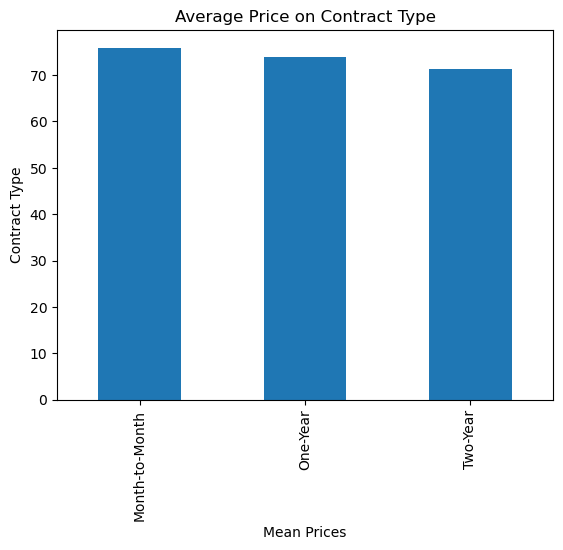

In [100]:
data.groupby("ContractType")["MonthlyCharges"].mean().plot(kind = "bar")
plt.xlabel("Mean Prices")
plt.ylabel("Contract Type")
plt.title("Average Price on Contract Type")
plt.show()

In [101]:
data.groupby("ContractType")["MonthlyCharges"].mean()

ContractType
Month-to-Month    75.909198
One-Year          73.822803
Two-Year          71.334500
Name: MonthlyCharges, dtype: float64

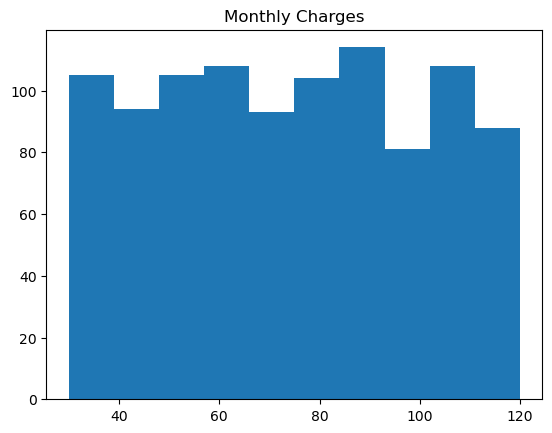

In [102]:
plt.hist(data["MonthlyCharges"])
plt.title("Monthly Charges")
plt.show()

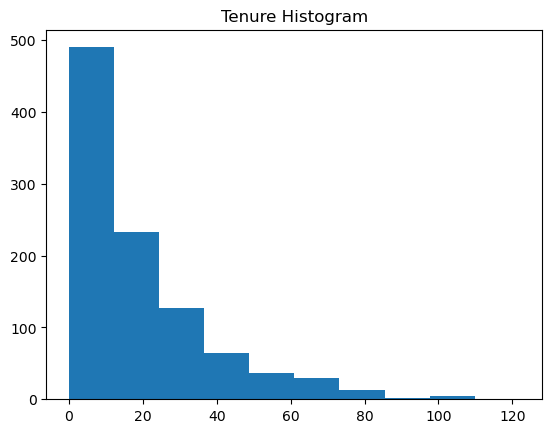

In [103]:
plt.hist(data["Tenure"])
plt.title("Tenure Histogram")
plt.show()

In [104]:
x = data[["Age","Gender","Tenure","MonthlyCharges"]]
y = data["Churn"]

In [105]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [106]:
y

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
995    Yes
996    Yes
997    Yes
998    Yes
999    Yes
Name: Churn, Length: 1000, dtype: object

In [107]:
x["Gender"] = x["Gender"].apply(lambda x: 1 if x == "Yes" else 0)
y = y.apply(lambda y: 1 if y == "Yes" else 0)

C:\Users\agarw\AppData\Local\Temp\ipykernel_14864\151335995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Gender"] = x["Gender"].apply(lambda x: 1 if x == "Yes" else 0)


In [108]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,0,2,63.79
3,60,0,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,0,15,111.72
998,39,0,68,65.67


In [109]:
type(x["Gender"][0])

numpy.int64

In [110]:
type(y[0])

numpy.int64

In [111]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Churn, Length: 1000, dtype: int64

In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.2,random_state=42)

In [113]:
x_train

,Age,Gender,Tenure,MonthlyCharges
29,42,0,62,97.66
535,45,0,21,102.76
695,41,0,32,49.00
557,40,0,50,114.46
836,60,0,53,89.57
...,...,...,...,...
106,63,0,10,119.90
270,59,0,5,81.69
860,47,0,55,78.63
435,45,0,12,117.13


In [114]:
x_train_scaled = StandardScaler()

In [115]:
x_train = x_train_scaled.fit_transform(x_train)

In [116]:
joblib.dump(x_train_scaled,"scaler.pkl")

['scaler.pkl']

In [117]:
x_test = x_train_scaled.fit_transform(x_test)

In [118]:
def model_performance(predictions):
    print("Accuracy score of model : {}".format(accuracy_score(y_test,predictions)))

In [119]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [120]:
y_pred = model.predict(x_test)

In [121]:
model_performance(y_pred)

Accuracy score of model : 0.885


In [122]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    "n_neighbors" : [3,5,7,9],
    "weights" : ["uniform","distance"],
}

In [123]:
from sklearn.model_selection import GridSearchCV
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)
gridkn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [124]:
y_knn_pred = gridkn.predict(x_test)

In [125]:
y_knn_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [126]:
model_performance(y_knn_pred)

Accuracy score of model : 0.86


In [127]:
svm = SVC()

In [128]:
param_grid2 = {
    "C" : [0.01,0.1,0.5,1],
    "kernel" : ["linear","rbf","poly"]
}

In [129]:
grid_svc = GridSearchCV(svm, param_grid2, cv = 5)

In [130]:
grid_svc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [131]:
y_pred3 = grid_svc.predict(x_test)

In [132]:
grid_svc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [133]:
model_performance(y_pred3)

Accuracy score of model : 0.885


In [134]:
from sklearn.tree import DecisionTreeClassifier
param_grid3 = {
    "max_depth" : [None,10,20,30],
    "criterion" : ["gini","entropy"],
    "min_samples_split" :[2,5,10],
    "min_samples_leaf" :[1,2,4],
    "splitter" : ["best","random"]
}
new_tree = GridSearchCV(DecisionTreeClassifier(),param_grid3,cv = 5)
new_tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [135]:
new_tree.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [136]:
y_pred_dt = new_tree.predict(x_test)

In [137]:
model_performance(y_pred_dt)

Accuracy score of model : 0.86


In [139]:
from sklearn.ensemble import RandomForestClassifier
param_grid3 = {
    "max_features" : [2,3,4],
    "bootstrap" : [True,False],
    "n_estimators" :[32,64,128,256]
}
rando = RandomForestClassifier()
model_rando = GridSearchCV(rando,param_grid3,cv = 5)

In [140]:
model_rando.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [144]:
y_pred_rando = model_rando.predict(x_test)

In [145]:
model_performance(y_pred_rando)

Accuracy score of model : 0.86


In [146]:
model_rando.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

In [149]:
best_model_performer = grid_svc.best_estimator_

In [151]:
joblib.dump(best_model_performer,"best_model.pkl")

['best_model.pkl']